#EDGE DETECTION


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.image as mpimg
from scipy import signal
from scipy import ndimage

In [9]:
def rgb2gray(rgb_image):
    return np.dot(rgb_image[...,:3], [0.301, 0.678, 0.134])

#IMAGE LOADING

image = mpimg.imread("/content/BIRD.jpeg")
image_gr = rgb2gray( image )
figureSize = (8,6)


###Perwitt Filter

In [10]:
#Horiozontal edge detection filter
prewitt_h = np.array([[ -1 , 0 , 1 ] ,
                      [ -1 , 0 , 1 ] ,
                      [ -1 , 0 , 1 ] ])

#vertical edge detection filter
prewitt_v = prewitt_h.transpose()

image_gr_norm = image_gr / 240.
image_prewit_h = signal.convolve2d( image_gr_norm , prewitt_h ,'same')
image_prewit_v = signal.convolve2d( image_gr_norm , prewitt_v ,'same')


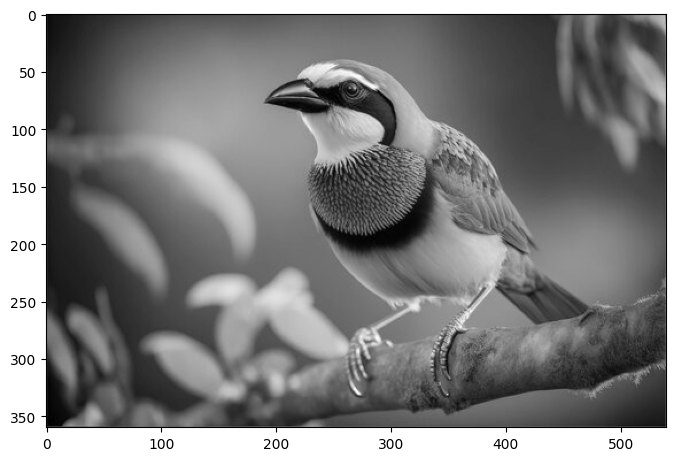

In [12]:
plt.figure("Original", figsize=figureSize)
plt.imshow(image_gr_norm)
plt.set_cmap("gray")

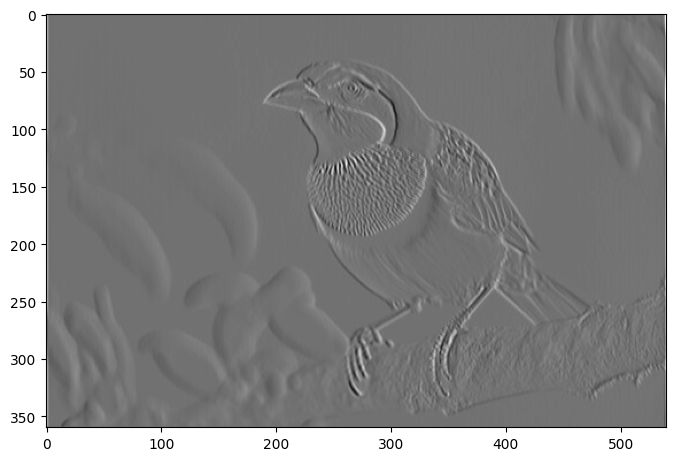

In [13]:
plt.figure("Prewit horizontal", figsize=figureSize)
plt.imshow(image_prewit_h)

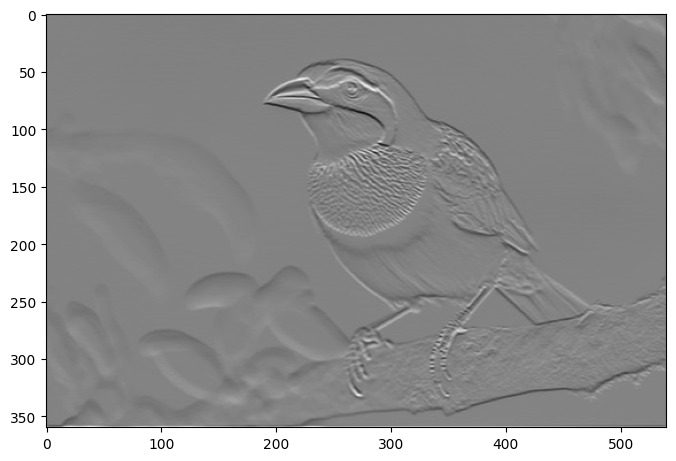

In [14]:
plt.figure("Prewit vertical", figsize=figureSize)
plt.imshow(image_prewit_v)

###Sobel Filter

In [44]:
# Define the horizontal Sobel operator
sobel_h = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Transpose the horizontal Sobel operator to get the vertical Sobel operator
sobel_v = sobel_h.transpose()



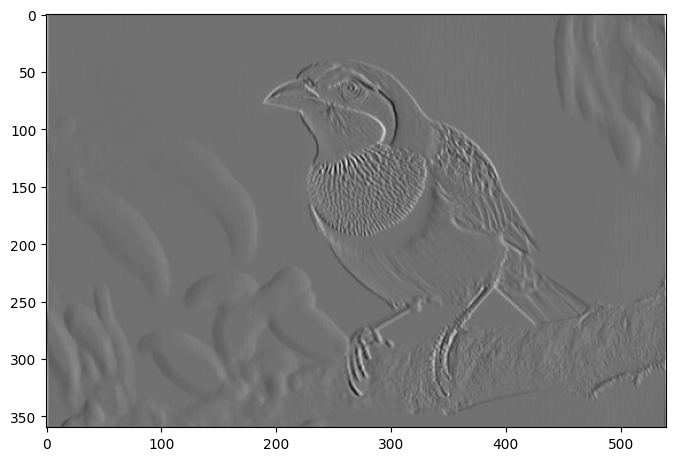

In [30]:
image_sobel_h = signal.convolve2d( image_gr_norm , sobel_h ,'same')
plt.figure("Sobel horizontal", figsize=figureSize)
plt.imshow(image_sobel_h)

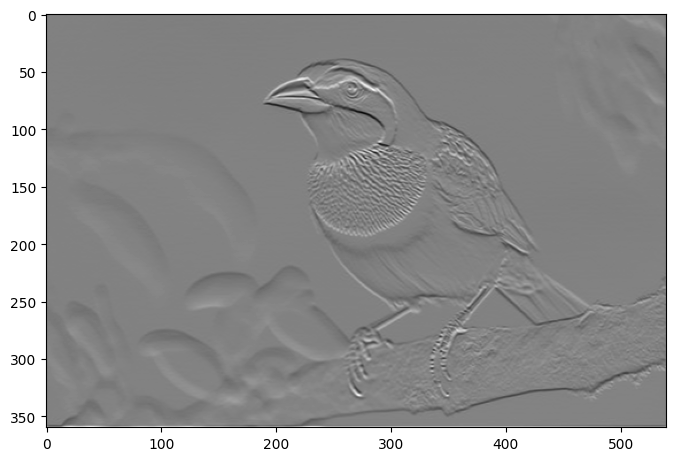

In [31]:
image_sobel_v = signal.convolve2d( image_gr_norm , sobel_v ,'same')
plt.figure("Sobel vertical", figsize=figureSize)
plt.imshow(image_sobel_v)


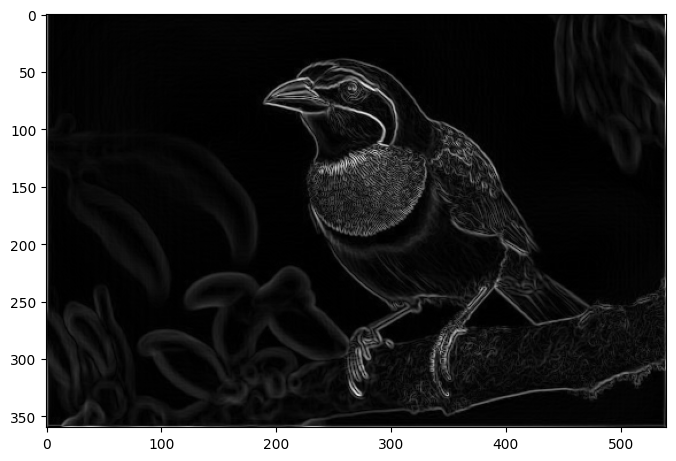

In [43]:
def gradient_sobel(img):
    # Convolve the image with horizontal and vertical Sobel operators
    image_sobel_h = signal.convolve2d(img, sobel_h, 'same')
    image_sobel_v = signal.convolve2d(img, sobel_v, 'same')

    # Calculate the gradient magnitude
    gradient = np.sqrt(image_sobel_h * image_sobel_h + image_sobel_v * image_sobel_v)

    return gradient

# Calculate the gradient magnitude using the gradient_sobel function
image_sobel_gradient = gradient_sobel(image_gr_norm)

# Display the Sobel gradient image
plt.figure("Sobel gradient", figsize=figureSize)
plt.imshow(image_sobel_gradient)

